In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from dhdrnet.util import ROOT_DIR, DATA_DIR
stats_dir = ROOT_DIR / "precomputed_data"
fig_dir = ROOT_DIR / "figures" / "ev_choices" / "ev_correct"
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
from dhdrnet.histogram_classifier import to_histogram

In [20]:
image_names = list(pd.read_csv(stats_dir / "test_current.csv")["names"])
sample_size = 15
name_sample = random.sample(image_names, sample_size)
name_sample

['c483_20150901_221141_886',
 '1125_20151229_162004_675',
 '6G7M_20150328_163149_545',
 '0006_20160726_110609_666',
 '0543_20150918_175650_498',
 '6G7M_20150403_181052_205',
 '5066_20160630_094234_723',
 '0919_20150906_131742_018',
 '4KK2_20150822_215204_476',
 '33TJ_20150731_221900_339',
 'J6VL_20150312_193105_564',
 '0094_20150412_110708_625',
 '1125_20151227_183317_712',
 '0830_20151127_164655_217',
 '0272_20160515_161021_764']

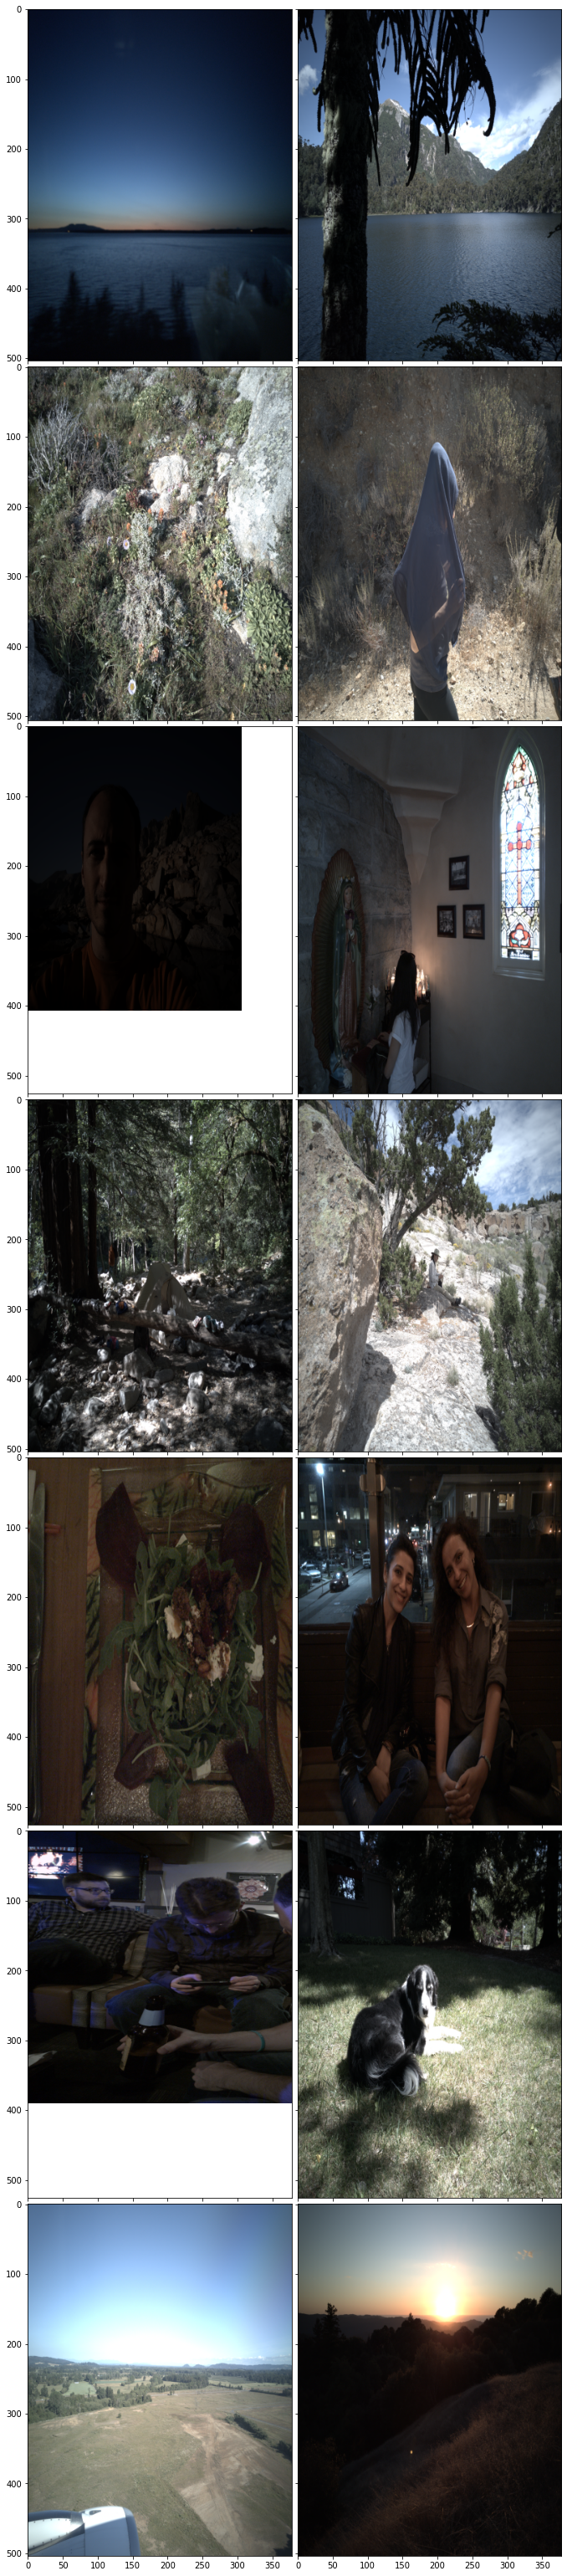

In [21]:
# using the data generator to get the proper images
from dhdrnet.gen_pairs import GenAllPairs
from more_itertools import one
from dhdrnet.vis_util import rgb_bgr_swap, show_image_grid

gen = GenAllPairs(
    raw_path=DATA_DIR/"dngs",
    out_path=DATA_DIR/"correct_exposures"/"exposures",
    store_path=None,
    compute_scores=False
)
sample_mid_exposures = [rgb_bgr_swap(one(gen.get_exposures(name, [0.0]))) for name in name_sample]
show_image_grid(sample_mid_exposures)

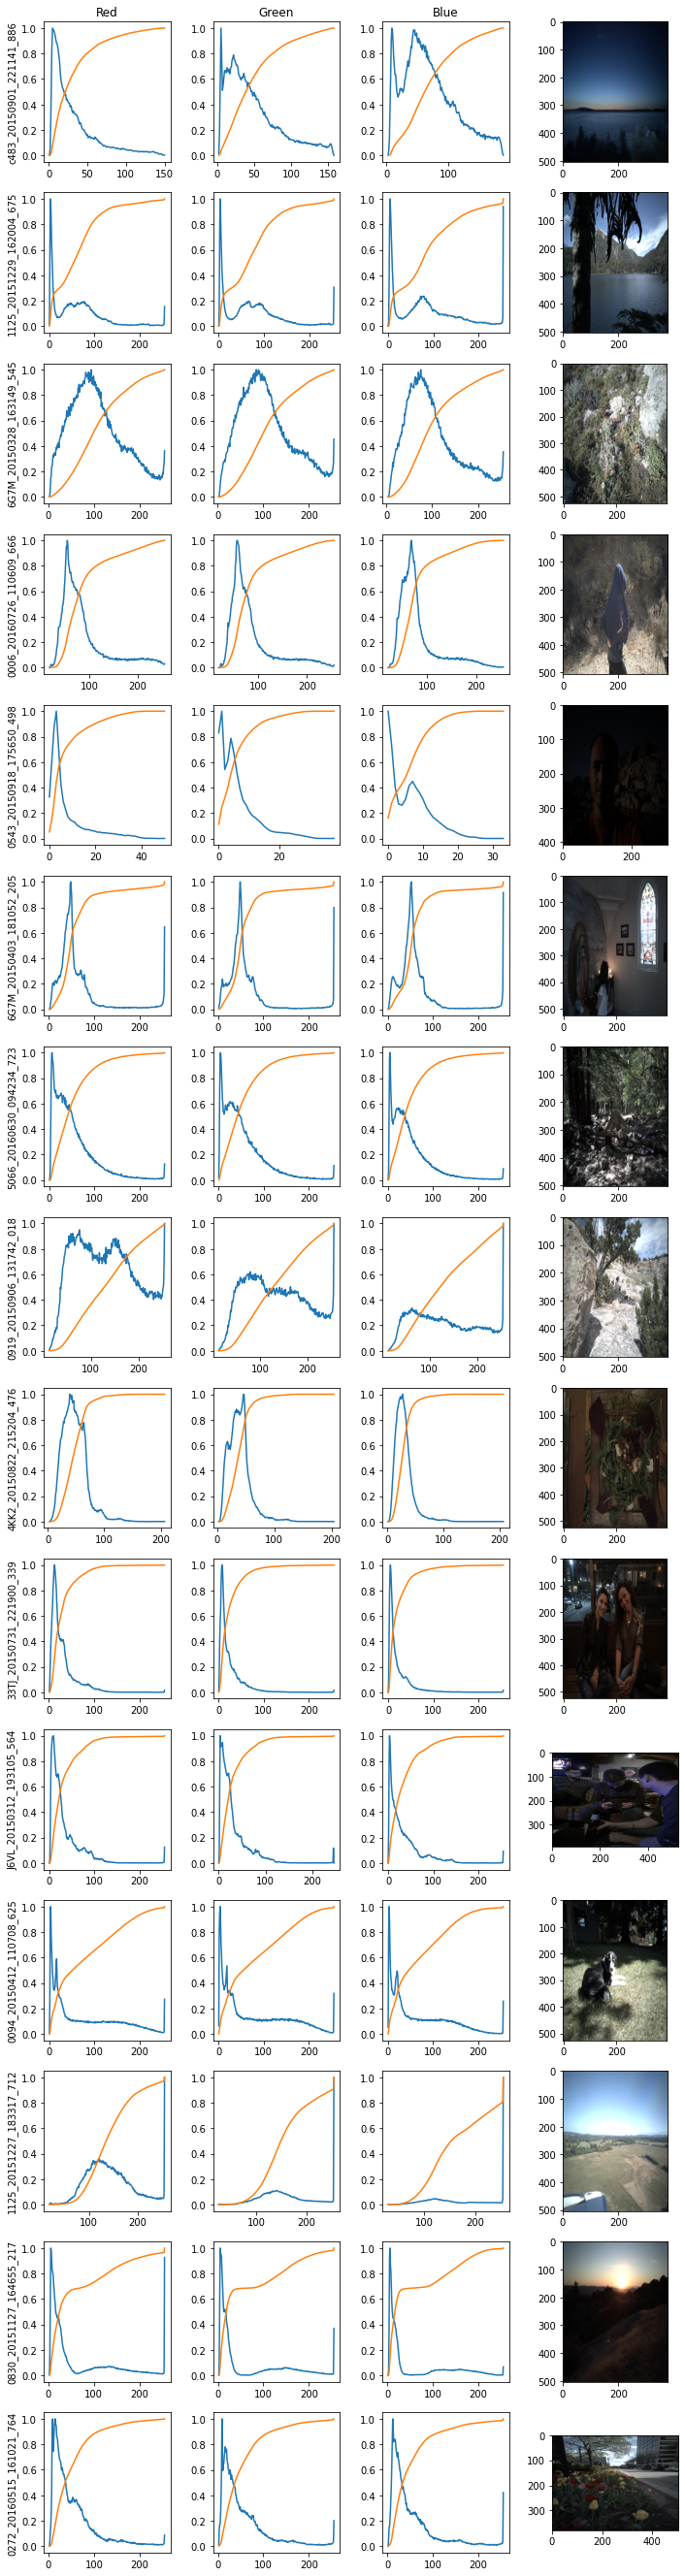

In [50]:
from skimage import exposure
ncols=4
fig, axes = plt.subplots(nrows=sample_size, ncols=ncols, figsize=[int(2.5*i) for i in (ncols, sample_size)])
for i, image in enumerate(sample_mid_exposures):
    for c , colour in enumerate(("red", "green", "blue", "src")):
        if colour == "src":
            axes[i,c].imshow(image)
            continue
            
        hist, bins = exposure.histogram(image[...,c])
        axes[i,c].plot(bins, hist / hist.max())
        image_cdf, bins = exposure.cumulative_distribution(image[...,c])
        axes[i,c].plot(bins,image_cdf)
        axes[i,0].set_ylabel(name_sample[i])
        
axes[0,0].set_title("Red")
axes[0,1].set_title("Green")
axes[0,2].set_title("Blue")

plt.tight_layout()
plt.show()